# <center> Data Simulation 
# <center> Bi-Allelic Wright-Fisher with Mutation and Selection

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('..')  # add parent directory to path to import utils
from utils import set_plots_size_params

In [2]:
def wf_with_selection_and_mutation(wt_freq, population_size, fitness, mutation_rate):
    """
    This is the heart of the model: bi-allele Wright-Fisher with selection and mutation.
    Math adapted from: https://academic.oup.com/sysbio/article/66/1/e30/2670014#syw056M2
    Note that the order of selectiona and mutation is relevant to the results.
    """
    wt_freq = (wt_freq * fitness) / ((1 - wt_freq) + (wt_freq * fitness))     # selection
    wt_freq = wt_freq * (1 - mutation_rate) + (1 - wt_freq) * mutation_rate   # mutation
    wt_freq = np.random.binomial(population_size, wt_freq) / population_size  # bottleneck
    return wt_freq


def wf_multiple_generations(generations_number, wt_freq, population_size, fitness, mutation_rate, sequence_sample_size,
                            color=None, label=None, plot=True):
    freqs = [wt_freq]
    for i in range(generations_number - 1):
        wt_freq = wf_with_selection_and_mutation(wt_freq=wt_freq, population_size=population_size,
                                                 fitness=fitness, mutation_rate=mutation_rate)
        freqs.append(wt_freq)
    freqs = np.random.binomial(sequence_sample_size, freqs) / sequence_sample_size  # sequence sampling
    if plot:
        plt.plot(range(generations_number), freqs, color=color, label=label, alpha=0.1)
    return np.array(freqs)


def simulate_data(generations_number, wt_freqs, population_size, fitness, mutation_rate, sequence_sample_size,
                  initial_gen=0, color=None, label=None, plot=True):
    """
    This function has 3 uses:
        1. Its the model's simulator
        2. It is used to synthesize data for posterior predictive checks
        3. It's used to plot the data and get a better intuition to what is actually going on
    """
    if plot:
        plt.xlabel('Generation')
        plt.ylabel('Frequency')
    data = []
    if label is None:
        label = f"w={fitness}, mu={mutation_rate}"
    first_run = True
    for freq in wt_freqs:
        datum = wf_multiple_generations(generations_number=generations_number, wt_freq=freq, plot=plot,
                                        population_size=population_size, fitness=fitness, mutation_rate=mutation_rate,
                                        color=color, sequence_sample_size=sequence_sample_size,
                                        label=label if first_run else None)
        data.append(datum)
        first_run = False
    if plot:
        leg = plt.legend()
        for lh in leg.legendHandles:
            lh.set_alpha(1)
    df = pd.DataFrame(data)
    df.columns += initial_gen
    return df


In [7]:
import timeit
%timeit simulate_data(generations_number=10, wt_freqs=np.ones(100)*0.7, population_size=10**3, sequence_sample_size=10**3, fitness=1, mutation_rate=0, color='orange', label='pop=1000', plot=False)


6.37 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
set_plots_size_params(20)

# Bigger population size -->  less drift = less stochastic data:

Text(0.5, 1.0, 'mutation rate = 0, fitness = 1')

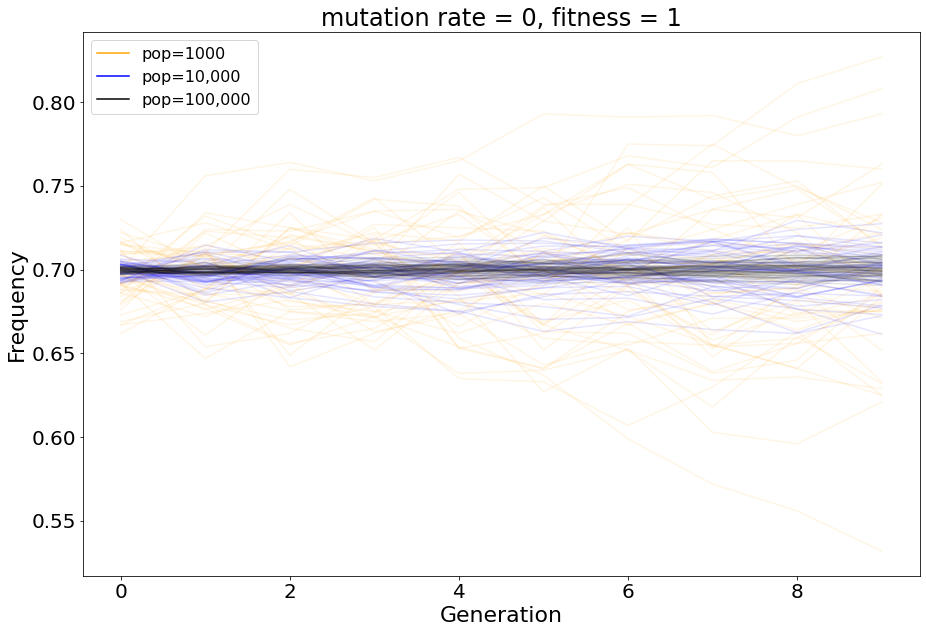

In [30]:
plt.figure(figsize=(15,10))
simulate_data(generations_number=10, wt_freqs=np.ones(50)*0.7, population_size=10**3, sequence_sample_size=10**3,
              fitness=1, mutation_rate=0, color='orange', label='pop=1000')
simulate_data(generations_number=10, wt_freqs=np.ones(50)*0.7, population_size=10**4, sequence_sample_size=10**4, 
              fitness=1, mutation_rate=0, color='blue', label='pop=10,000')
simulate_data(generations_number=10, wt_freqs=np.ones(50)*0.7, population_size=10**5, sequence_sample_size=10**5, 
              fitness=1, mutation_rate=0, color='black', label='pop=100,000')
plt.title("mutation rate = 0, fitness = 1")

# Higher fitness --> faster and narrower convergence:

Text(0.5, 1.0, 'mutation rate = 0')

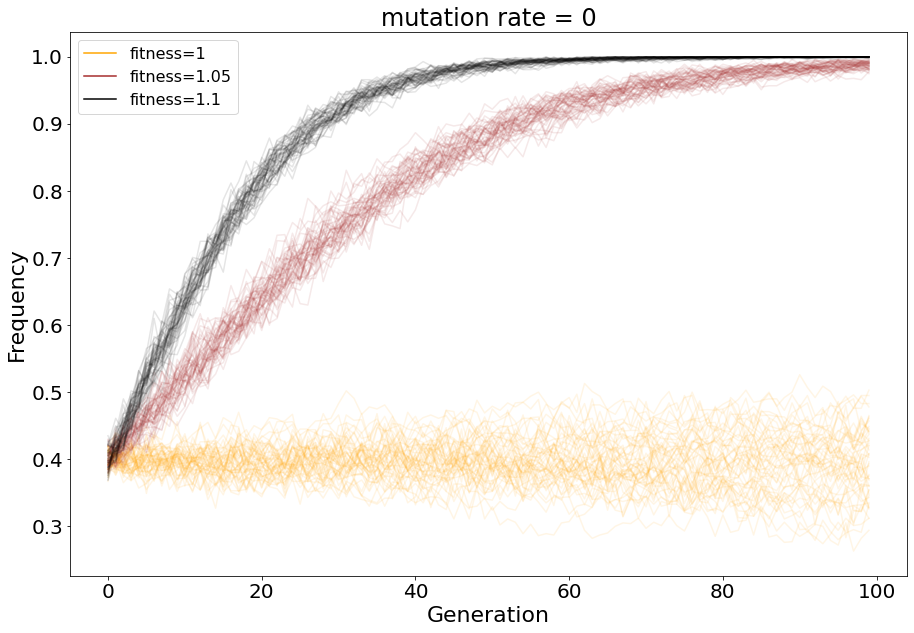

In [43]:
plt.figure(figsize=(15,10))
generations_number = 100
wt_freqs = np.ones(50)*0.4
population_size = 10**4
sequence_sample_size = 10**3
mutation_rate = 0
simulate_data(fitness=1, mutation_rate=mutation_rate, color='orange', label='fitness=1',
              generations_number=generations_number, wt_freqs=wt_freqs, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
simulate_data(fitness=1.05, mutation_rate=mutation_rate, color='brown', label='fitness=1.05',
              generations_number=generations_number, wt_freqs=wt_freqs, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
simulate_data(fitness=1.1, mutation_rate=mutation_rate, color='black', label='fitness=1.1',
              generations_number=generations_number, wt_freqs=wt_freqs, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
plt.title("mutation rate = 0")

# When fitness is neglible, mutation rate is the rate of enthropy:

Text(0.5, 1.0, 'fitness = 1')

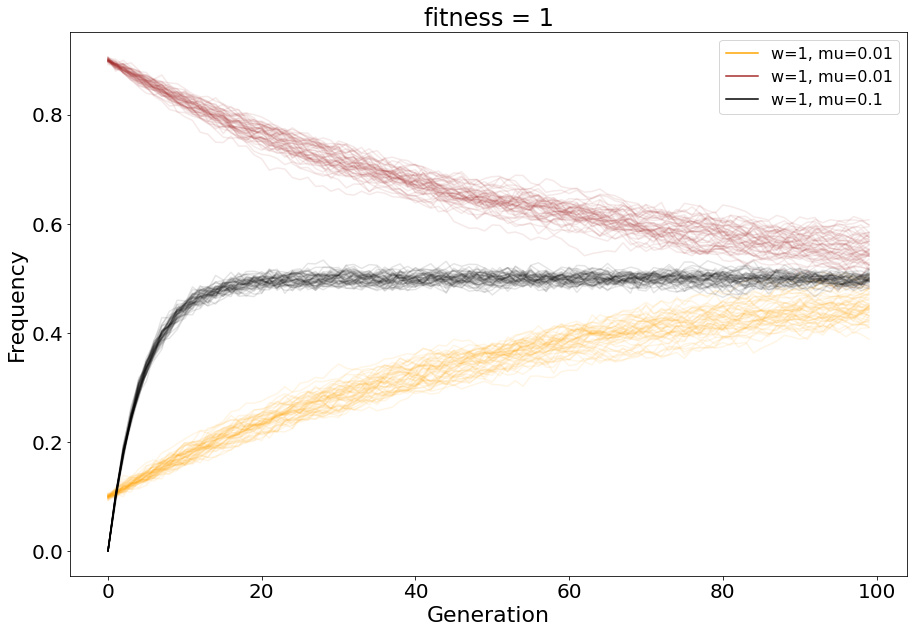

In [55]:
plt.figure(figsize=(15,10))
generations_number = 100
wt_freqs = np.ones(50)*0.1
population_size = 10**4
sequence_sample_size = 10**4
fitness = 1
simulate_data(fitness=fitness, mutation_rate=10**-2, color='orange', 
              generations_number=generations_number, wt_freqs=np.ones(50)*0.1, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
simulate_data(fitness=fitness, mutation_rate=10**-2, color='brown', 
              generations_number=generations_number, wt_freqs=np.ones(50)*0.9, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
simulate_data(fitness=fitness, mutation_rate=10**-1, color='black', 
              generations_number=generations_number, wt_freqs=np.ones(50)*0.001, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
plt.title("fitness = 1")

# For a deadly mutation, the stationary distribution is the mutation rate:

Text(0.5, 1.0, 'fitness = 0')

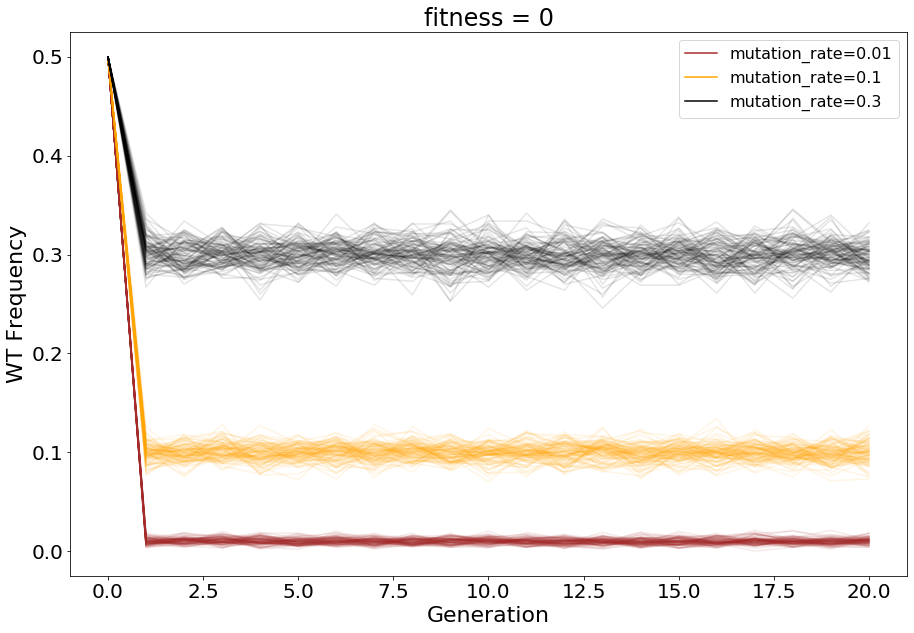

In [7]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=20, wt_freq=0.5, population_size=1000, 
             fitness=0, mutation_rate=0.01, color='brown', label='mutation_rate=0.01')
simulate_100(generations_number=20, wt_freq=0.5, population_size=1000, 
             fitness=0, mutation_rate=0.1, color='orange', label='mutation_rate=0.1')
simulate_100(generations_number=20, wt_freq=0.5, population_size=1000, 
             fitness=0, mutation_rate=0.3, color='black', label='mutation_rate=0.3')
plt.title('fitness = 0')

# Fitness and mutation rate interact to set the stationary distribution:

Text(0.5, 1.0, 'fitness = 1.05')

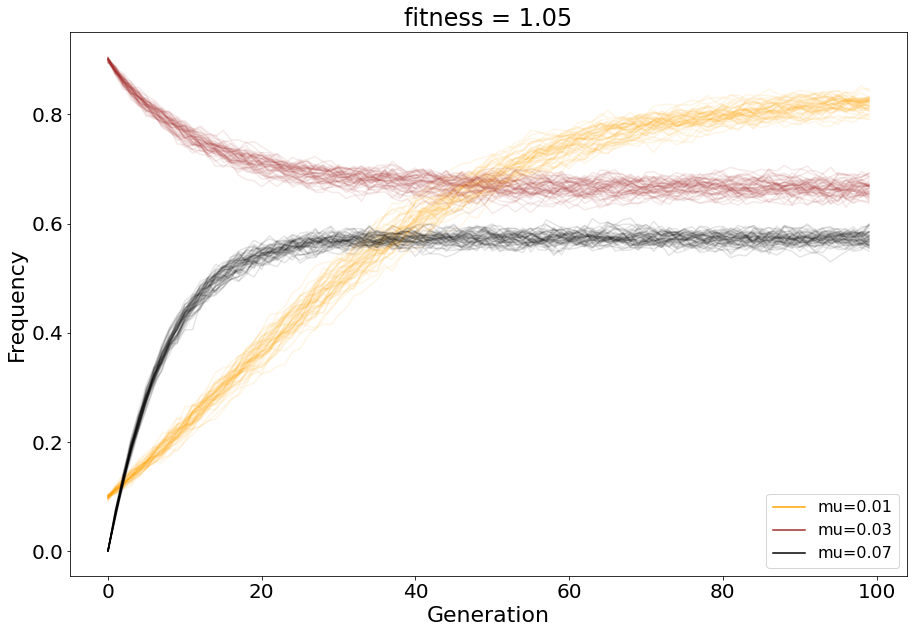

In [68]:
plt.figure(figsize=(15,10))
generations_number = 100
wt_freqs = np.ones(50)*0.6
population_size = 10**4
sequence_sample_size = 10**4
fitness = 1.05
simulate_data(fitness=fitness, mutation_rate=10**-2, color='orange', label='mu=0.01',
              generations_number=generations_number, wt_freqs=np.ones(50)*0.1, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
simulate_data(fitness=fitness, mutation_rate=3*10**-2, color='brown', label='mu=0.03',
              generations_number=generations_number, wt_freqs=np.ones(50)*0.9, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
simulate_data(fitness=fitness, mutation_rate=7*10**-2, color='black', label='mu=0.07',
              generations_number=generations_number, wt_freqs=np.ones(50)*0.001, sequence_sample_size=sequence_sample_size,
              population_size=population_size)
plt.title("fitness = 1.05")

# And a zoom into drift

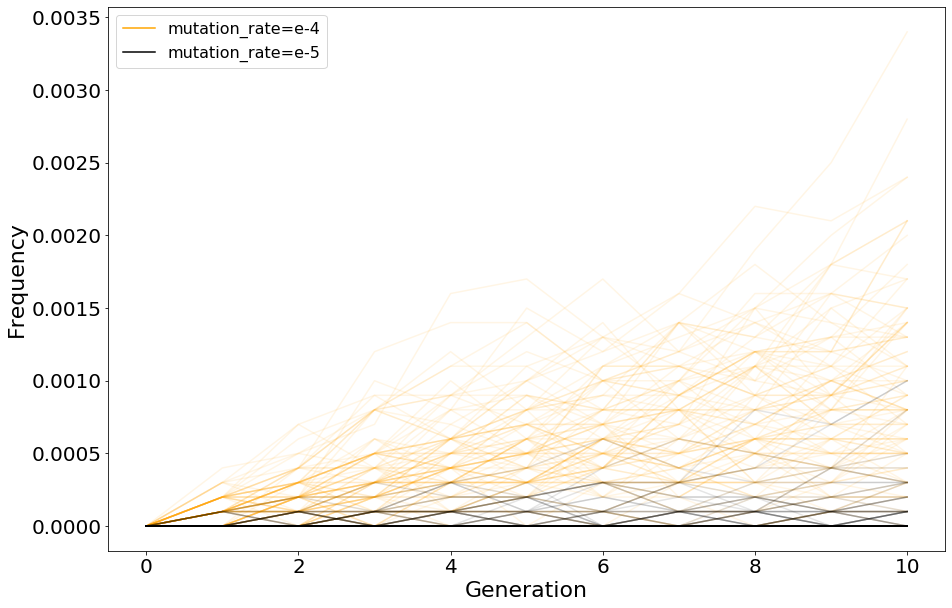

In [115]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=10, wt_freq=0, population_size=10000000, sequence_sample_size=10000,
             fitness=1, mutation_rate=0.0001, color='orange', label='mutation_rate=e-4')
simulate_100(generations_number=10, wt_freq=0, population_size=10000000, sequence_sample_size=10000,
             fitness=1, mutation_rate=0.00001, color='black', label='mutation_rate=e-5')

# In lower frequencies mutation rate >> fitness:

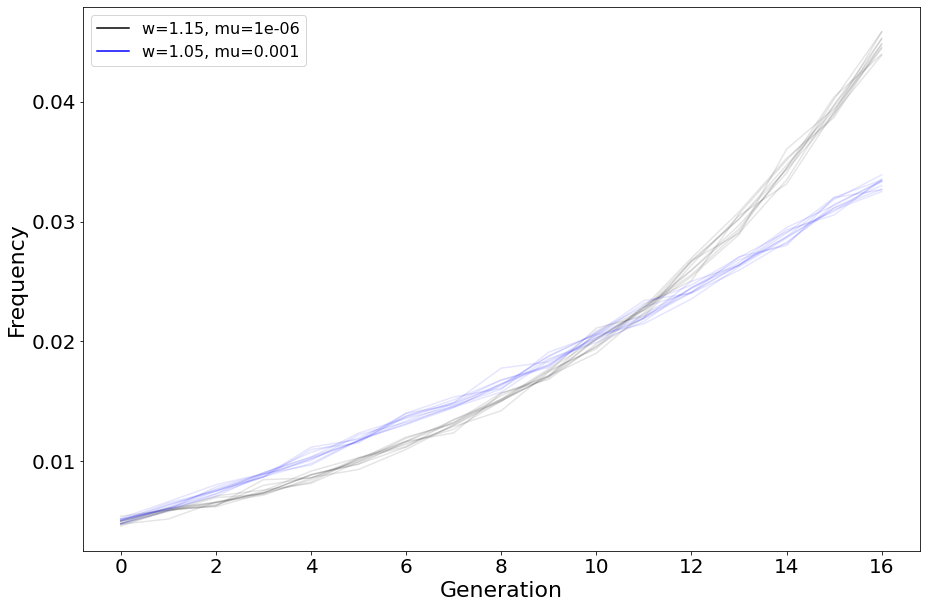

In [39]:
plt.figure(figsize=(15,10))
gens = 17
ps = 10 ** 8
ss = 10 ** 5
freq = 0.005
simulate_data(generations_number=gens, wt_freqs=freq*np.ones(10), population_size=ps, fitness=1.15, 
              mutation_rate=10**-6, 
              sequence_sample_size=ss, color='black', label=None, plot=True)
simulate_data(generations_number=gens, wt_freqs=freq*np.ones(10), population_size=ps, fitness=1.05, 
              mutation_rate=10**-3, 
              sequence_sample_size=ss, color='blue', label=None, plot=True)
plt.show()

# So, to tell between a 10^-3 and a 10^-4 mutation rate over 10 generations we would need a population size of ~ 50K:

Text(0.5, 1.0, 'fitness = 1, population size = 50K')

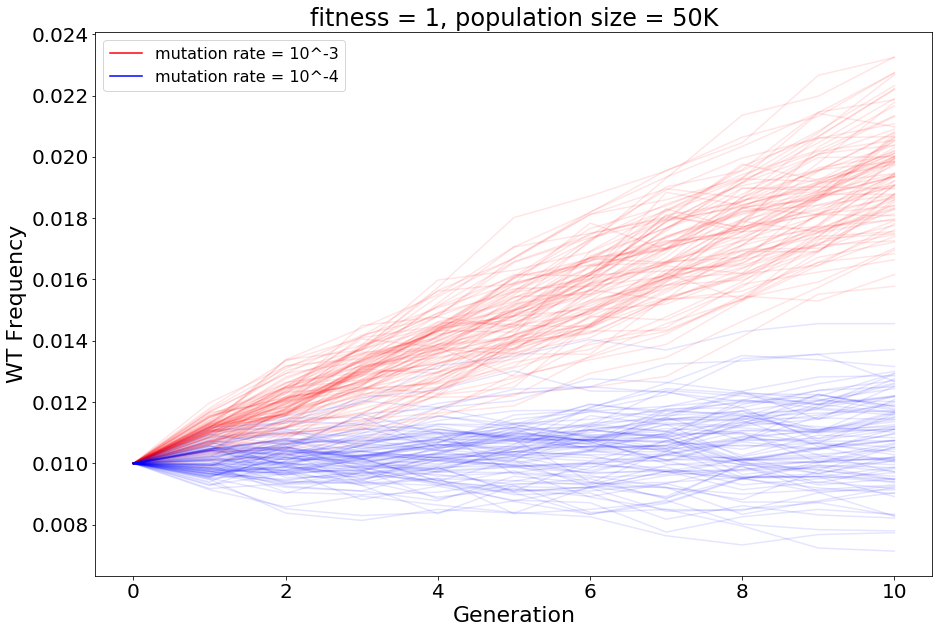

In [9]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=10, wt_freq=0.01, population_size=50000, 
             fitness=1, mutation_rate=0.001, color='red', label="mutation rate = 10^-3")
simulate_100(generations_number=10, wt_freq=0.01, population_size=50000, 
             fitness=1, mutation_rate=0.0001, color='blue', label="mutation rate = 10^-4")
plt.title("fitness = 1, population size = 50K")

Text(0.5, 1.0, 'fitness = 1, population size = 10K => hard to tell them apart..!')

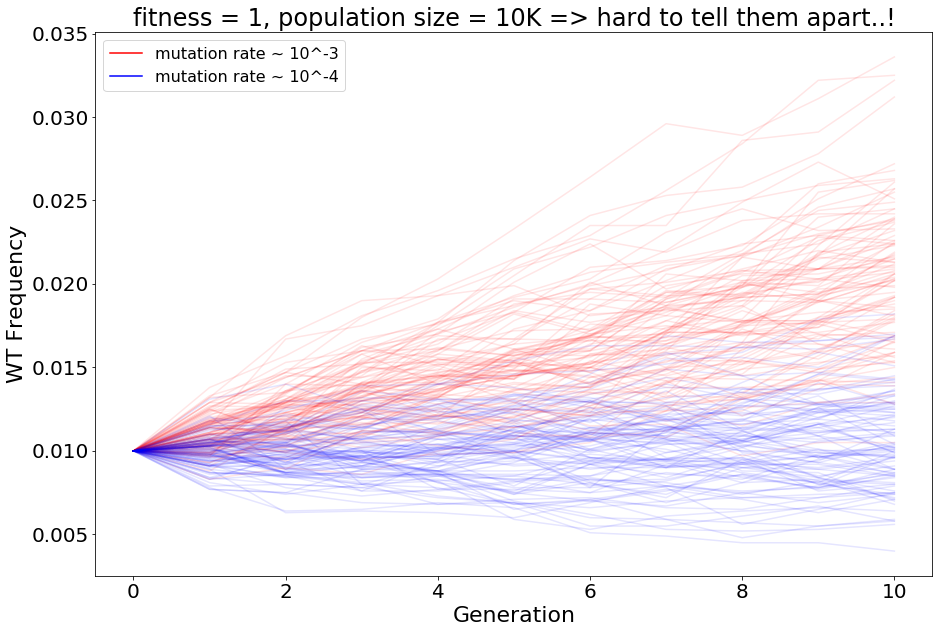

In [10]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=10, wt_freq=0.01, population_size=10000, 
             fitness=1, mutation_rate=0.001, color='red', label="mutation rate ~ 10^-3")
simulate_100(generations_number=10, wt_freq=0.01, population_size=10000, 
             fitness=1, mutation_rate=0.0001, color='blue', label="mutation rate ~ 10^-4")
plt.title("fitness = 1, population size = 10K => hard to tell them apart..!")